# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#STEP 0: LOAD AND PREPARE DATA
# 1. Load the file
df = pd.read_csv('DatasetAfricaMalaria.csv')
print("Original Data Shape:", df.shape)
# 2. Rubric Check: Show Missing Values
print("\nMissing Values found:")
print(df.isnull().sum()[df.isnull().sum() > 0])
# 3. Handle Non-Numeric Data
df_numeric = df.select_dtypes(include=[np.number])
# 4. Clean Missing Values
df_clean = df_numeric.fillna(df_numeric.mean())
# 5. Convert to Numpy Array
data = df_clean.values
print("\nFinal Data Shape:", data.shape)
# After loading the data, I need to check if it meets the requirements I'm looking for
print("Dataset requirements check:")
print(f"1. Shape: {df.shape}")
print(f"2. >10 columns: {df.shape[1] > 10}")
print(f"3. Missing values present: {df.isnull().sum().sum() > 0}")
print(f"4. Non-numeric columns: {list(df.select_dtypes(include=['object']).columns)}")
print(f"   Count: {len(df.select_dtypes(include=['object']).columns)}")

Original Data Shape: (594, 27)

Missing Values found:
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water services, urban (% of urban population)         418
People using safely managed sanitation services (% of population)                          462
People using safely managed sanitation services, rural (% of rural population)             

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

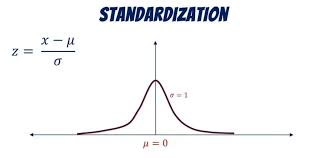


In [13]:
# --- STEP 1: LOAD AND STANDARDIZE THE DATA ---

# 1. Calculate Mean and Standard Deviation
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
# 2. Safety Check
data_std[data_std == 0] = 1
# 3. Apply the Standardization Formula
standardized_data = (data - data_mean) / data_std
# 4. Display Result
print("Standardized Data Shape:", standardized_data.shape)
print("\nFirst 5 rows of standardized data:")
print(standardized_data[:5])

Standardized Data Shape: (594, 24)

First 5 rows of standardized data:
[[-1.58113883e+00 -1.21256459e+00 -5.06760222e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.55710122e-16  0.00000000e+00
   5.41893472e-16 -1.20335604e+00  1.84377536e+00 -1.45712868e+00
  -1.23400095e+00 -1.66809102e+00  1.23397271e+00 -5.61646882e-01
   1.49495110e+00  1.86242385e+00  1.15800583e+00  1.77365688e+00
   2.08348956e+00  1.99788845e+00  1.60900436e+00 -7.83191277e-01]
 [-1.58113883e+00  6.16449417e-01  2.20650663e-01 -2.59139328e+00
  -4.70762105e-02 -2.59441287e+00 -6.55710122e-16  0.00000000e+00
   5.41893472e-16  0.00000000e+00 -1.17007624e-15  0.00000000e+00
  -7.98503589e-01  4.36548583e-01  7.98470288e-01  1.02714839e+00
  -1.04968763e+00 -1.49943184e+00 -2.03128810e+00 -8.45063064e-02
  -6.00246444e-01  2.98713596e-01 -8.95720879e-01  2.65347191e-02]
 [-1.58113883e+00  1.85097486e+00 -5.06772555e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.55710122e-16  0.00000000e+00
   

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [14]:
#STEP 3: CALCULATE THE COVARIANCE MATRIX

# 1. Get the number of samples (n)
n = standardized_data.shape[0]
# 2. Calculate Covariance
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n - 1)
# 3. Check the shape
print("Covariance Matrix Shape:", cov_matrix.shape)
# 4. Display the first 5 rows to verify
print("\nCovariance Matrix Sample:")
print(cov_matrix[:5, :5])

Covariance Matrix Shape: (24, 24)

Covariance Matrix Sample:
[[ 1.00168634 -0.06805428  0.3579472   0.2332233  -0.01830477]
 [-0.06805428  1.00168634  0.28899539  0.00430349  0.22993999]
 [ 0.3579472   0.28899539  1.00168634  0.13848034  0.14007824]
 [ 0.2332233   0.00430349  0.13848034  1.00168634  0.07030161]
 [-0.01830477  0.22993999  0.14007824  0.07030161  1.00168634]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [15]:
#STEP 4: PERFORM EIGENDECOMPOSITION

# 1. Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# 2. Keep only the real parts
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
# 3. Check the results
print("Eigenvalues Shape:", eigenvalues.shape)
print("Eigenvectors Shape:", eigenvectors.shape)
# 4. Show the first 5 eigenvalues
print("\nTop 5 Eigenvalues (Unsorted):")
print(eigenvalues[:5])

Eigenvalues Shape: (24,)
Eigenvectors Shape: (24, 24)

Top 5 Eigenvalues (Unsorted):
[7.47866447 2.23494453 2.04877421 1.77596923 1.46507889]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [16]:
#STEP 5: SORT PRINCIPAL COMPONENTS

# 1. Get indices that would sort the array
sorted_indices = np.argsort(eigenvalues)[::-1]
# 2. Reorder both Eigenvalues and Eigenvectors using these indices
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
# 3. Display the result
print("Top 5 Sorted Eigenvalues:")
print(sorted_eigenvalues[:5])

Top 5 Sorted Eigenvalues:
[7.47866447 2.23494453 2.04877421 1.77596923 1.46507889]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [17]:
# --- STEP 6: PROJECT DATA ONTO PRINCIPAL COMPONENTS ---

# 1. Choose number of components
num_components = 2  # We want a 2D plot
# 2. Select the top 2 Eigenvectors
eigenvector_subset = sorted_eigenvectors[:, :num_components]
# 3. Project the Data
reduced_data = np.dot(standardized_data, eigenvector_subset)
# 4. Check the Shape
print("Reduced Data Shape:", reduced_data.shape)

Reduced Data Shape: (594, 2)


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [18]:
#STEP 7: OUTPUT THE REDUCED DATA
print(f'Reduced Data Shape: {reduced_data.shape}')
print("\nFirst 5 rows of the 2D data:")
print(reduced_data[:5])

Reduced Data Shape: (594, 2)

First 5 rows of the 2D data:
[[ 4.22525811 -1.9622283 ]
 [-1.54423135 -0.47672866]
 [-1.78083426 -1.08796635]
 [ 2.86128444  0.17608171]
 [-2.52840042 -0.48298968]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

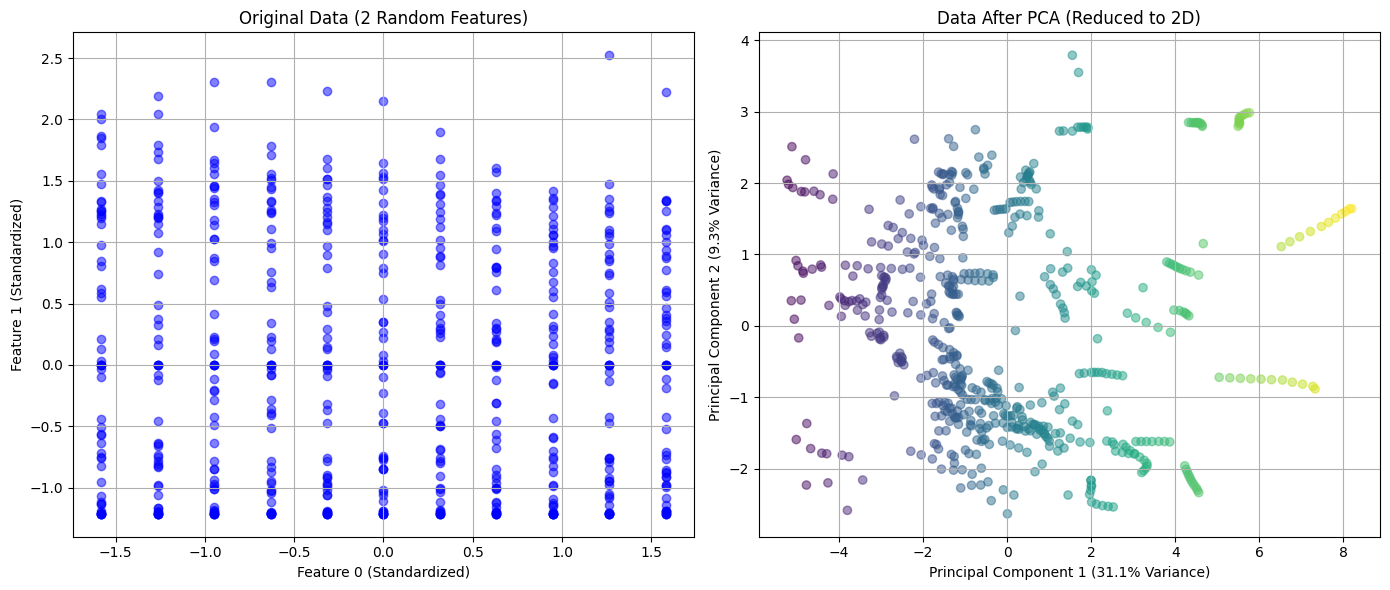

In [19]:
#STEP 8: VISUALIZE BEFORE AND AFTER PCA
plt.figure(figsize=(14, 6))
# Plot 1: Original Data
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5, c='blue')
plt.title("Original Data (2 Random Features)")
plt.xlabel("Feature 0 (Standardized)")
plt.ylabel("Feature 1 (Standardized)")
plt.grid(True)
# Plot 2: PCA Reduced Data
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, c=reduced_data[:, 0], cmap='viridis')
plt.title("Data After PCA (Reduced to 2D)")
# Calculate Variance for labels (Rubric Bonus)
var_1 = sorted_eigenvalues[0] / sum(sorted_eigenvalues) * 100
var_2 = sorted_eigenvalues[1] / sum(sorted_eigenvalues) * 100
plt.xlabel(f"Principal Component 1 ({var_1:.1f}% Variance)")
plt.ylabel(f"Principal Component 2 ({var_2:.1f}% Variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# 1. Calculate the "Explained Variance Ratio" for each component
total_variance = sum(sorted_eigenvalues)
variance_ratios = sorted_eigenvalues / total_variance
# 2. Calculate the "Cumulative Variance"
cumulative_variance = np.cumsum(variance_ratios)
# 3. Find how many components are needed to reach 95% variance
threshold = 0.95
# np.argmax finds the first "True" value.
num_components_95 = np.argmax(cumulative_variance >= threshold) + 1
print("--- Dynamic Selection Results (Task 2) ---")
print(f"Total Variance Explained by the Top 2 Components (Graph): {cumulative_variance[1]*100:.2f}%")
print(f"Number of components actually needed to keep 95% of the data's info: {num_components_95}")

--- Dynamic Selection Results (Task 2) ---
Total Variance Explained by the Top 2 Components (Graph): 40.41%
Number of components actually needed to keep 95% of the data's info: 15
